In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

# Data file as variable
stroke_predictive_path = "data/healthcare-dataset-stroke-data.csv"

In [66]:
# Read .csv file
stroke_predictive_df = pd.read_csv(stroke_predictive_path)

# Display preview of data
# 5110 rows in dataframe, 12 columns
stroke_predictive_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [67]:
# Change columns to all lower case to match
stroke_predictive_df = stroke_predictive_df.rename(columns=str.lower)
stroke_predictive_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [68]:
# Check of dublicate IDs
# None found
duplicate_check = stroke_predictive_df.drop_duplicates(subset=["id"])
print(len(duplicate_check))

5110


In [69]:
# Check if any columns should be dropped
# All look appropriate, but bmi has 201 fewer rows of data
stroke_predictive_df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [70]:
# Drop rows with missing data so all match bmi's total
stroke_predictive = stroke_predictive_df.dropna(how='any')
stroke_predictive.count()

id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [71]:
# 895 subjects are minors 18 and under
# 574 subjects are children 12 and under
# 953 subjects are seniors 65 and over

minor_check = stroke_predictive[stroke_predictive.age <= 18]
senior_check = stroke_predictive[stroke_predictive.age >= 65]
child_check = stroke_predictive[stroke_predictive.age <= 12]
print(minor_check["id"].nunique(), 
      child_check["id"].nunique(), 
      senior_check["id"].nunique())

895 574 953


In [72]:
# Unique entries for column work_type (5)
# Clean
stroke_predictive["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [73]:
# Unique entries for column ever_married (2)
# Clean
stroke_predictive["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [74]:
# Unique entries for column residence_type (2)
# Clean
stroke_predictive["residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [75]:
# Unique entries for column smoking_status (4)
# Clean
stroke_predictive["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

# Does higher age increase the risk of stroke?

In [76]:
#grouping data by age groups 
age_bins_1 = [0 , 30 , 40 , 50 , 60, 70 , 80 , 90 ,  float("inf")]
age_labels_1 = ["0-30" , "31-40" , "41-50" , "51-60" , "61-70" , "71-80" , "81-90" , "91+"]

In [77]:
#Creating a new colum for the age groups
stroke_predictive.loc[: ,"age_group"] = pd.cut(stroke_predictive["age"] , bins=age_bins_1 , labels=age_labels_1 , right=False )
#grouping data by age group
age_grouped = stroke_predictive.groupby("age_group")
# Finding the number of individuals in each age group
age_grouo_counts = age_grouped.size()
print(age_grouo_counts)

age_group
0-30     1483
31-40     631
41-50     705
51-60     805
61-70     590
71-80     513
81-90     182
91+         0
dtype: int64


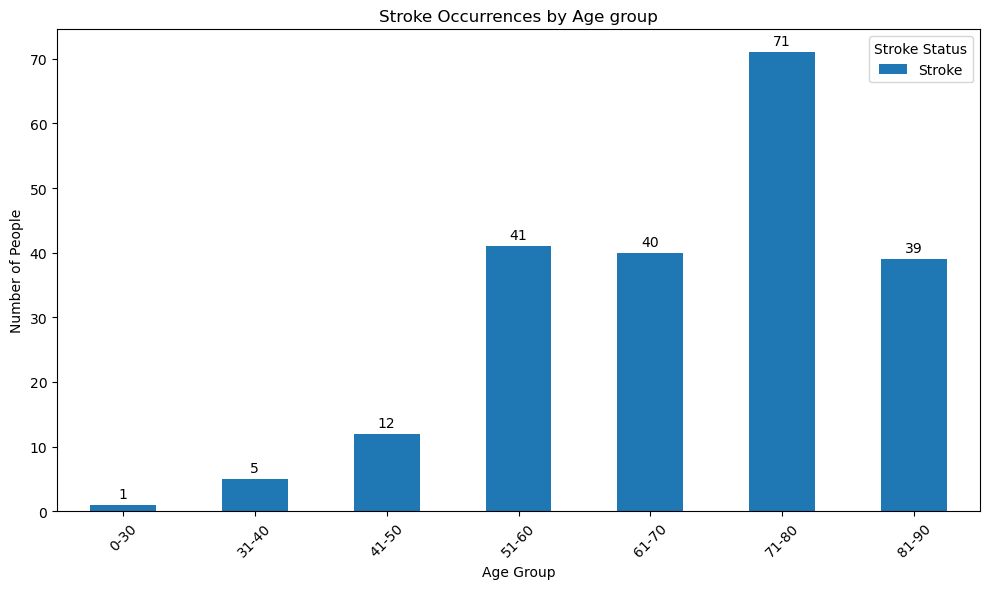

In [78]:
#Grouping by  stroke/no stroke for each age group
stroke_counts = stroke_predictive.groupby(["age_group" , "stroke"]).size().unstack(fill_value=0)

#Removing 91+ as no data for this catergory
filtered_stroke_counts = stroke_counts.drop("91+")

#filtering for only people who have had a stroke

filtered_stroke_counts2 = filtered_stroke_counts[[1]]

#creating a bar chart
bars_3 = filtered_stroke_counts2.plot(kind="bar", figsize=(10,6))
#titles and labels
plt.title("Stroke Occurrences by Age group")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.legend(["Stroke"] , title="Stroke Status")
plt.tight_layout()

#Adding the number of people ontop of each bar 
for bar in bars_3.containers:
    bars_3.bar_label(bar, fmt="%d" , padding= 3)

#Saving the chart
plt.savefig("graphs/Stroke Occurrences by Age group")
#show the chart
plt.show()

The bar chart displays the stroke occurence between varying age groups. From age 51-60 we see an increase of 29 stroke occurrences when compared to the age group of 41-50. There is a gradual increase in stroke occurrences with a high of 71 in ages 71-80. This graph visually comfirms higher age does increase the risk of stroke occurrence.

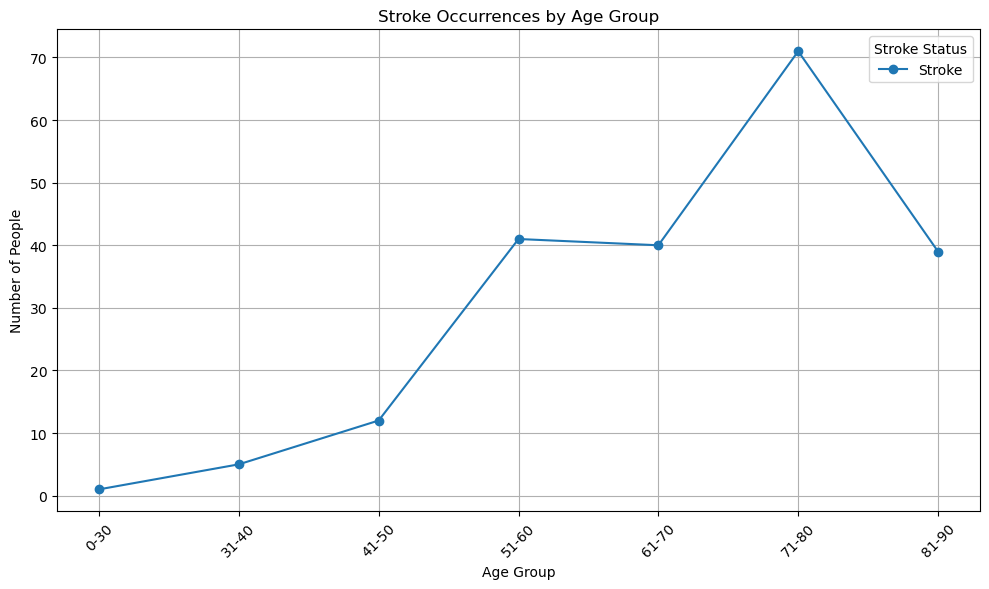

In [79]:
#Creating a line chart 
plt.figure(figsize=(10,6))
plt.plot(filtered_stroke_counts.index, filtered_stroke_counts[1] , marker="o" , label="Stroke")

#Adding titles , labels and grid
plt.title("Stroke Occurrences by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Stroke Status")
#Saving the chart
plt.savefig("graphs/Stroke Occurrences by Age group Line Chart")

#displaying the chart
plt.tight_layout()
plt.show()

This line graph displays the stroke occurrences distributed by age group. Storke occurrences seem to increase significantly as people age , There is a sharp rise in strokes for people in the 51-60 age. The highest number of strokes occurs in the 71-80 age group.This suggests that older adults , particularly those in their 70s face the greatest risk.

In [80]:
# Calculating the probability of having a stroke for each age group

# Getting the number of people who had a stroke
total_stroke_count = stroke_predictive[stroke_predictive["stroke"] == 1].groupby("age_group")["stroke"].count()
#Total number of people in each age group
total_count = stroke_predictive.groupby("age_group")["stroke"].count()

# Calculating the probability of stroke in each age group
stroke_probabilities = total_stroke_count / total_count

print(stroke_probabilities)

age_group
0-30     0.000674
31-40    0.007924
41-50    0.017021
51-60    0.050932
61-70    0.067797
71-80    0.138402
81-90    0.214286
91+           NaN
Name: stroke, dtype: float64


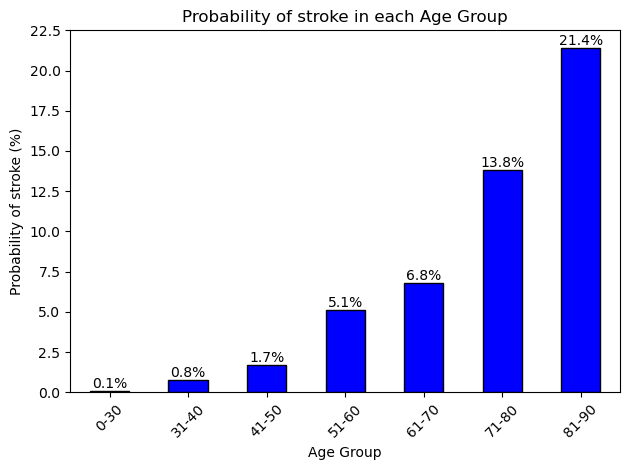

In [81]:
#creating a bar chart to display precentages 

# Removing the 91+ row and converting to precentages
stroke_probabilities_filtered = stroke_probabilities.drop("91+") * 100

bars = stroke_probabilities_filtered.plot(kind="bar" , color="blue" , edgecolor="black")

# adding labels and title
plt.title("Probability of stroke in each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Probability of stroke (%)")
plt.xticks(rotation = 45)


#displaying the precentage values on top of each bar
for bar in bars.containers:
    bars.bar_label(bar, fmt="%.1f%%")

#Saving the chart
plt.savefig("graphs/Probability of stroke in each Age Group")

# Displaying the bar chart
plt.tight_layout()
plt.show()

This bar chart illustrates the probability of stroke across diffrent age groups in percentages. We see a low probability in younger age groups and a gradual increase to middle age with a substantial rise in older age groups. From age 61 and onwards the probability begins to rise sharply with much higher risks seen in age groups 71-80 and 81-90. The highest stroke probability is found in the 81-90 age group but it is important to note the population in this age group is lower compared to others.

# Hypertension and heart disease impact on stroke

In [82]:
# check the hypertension and heart_disease columns value count summary
stroke_predictive[["hypertension","heart_disease"]].value_counts()

hypertension  heart_disease
0             0                4273
1             0                 393
0             1                 185
1             1                  58
Name: count, dtype: int64

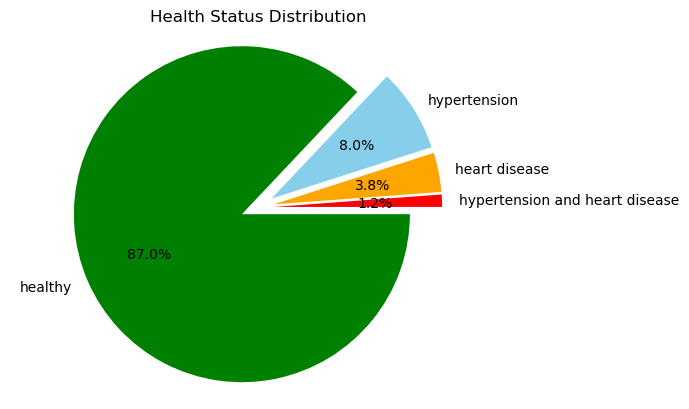

In [83]:
#creating a pie chart to visualize the health status distribution based on the conditions of hypertension and heart disease.
labels=["hypertension and heart disease","heart disease","hypertension","healthy"]
sizes=stroke_predictive[["hypertension","heart_disease"]].value_counts().sort_values(ascending=True)
colors=["red","orange","skyblue","green"]
explode = (0.1, 0.1, 0.1, 0.1)
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',explode=explode)
plt.title("Health Status Distribution")
plt.axis("equal") 
plt.savefig("graphs/healthstatus_pie.png")
plt.show()

In [84]:
#create a list of health status types
health_status=["Healthy", "Hypertension","Heart Disease","Hypertension and heart disease"]

#count people who dont have neither disease and have stroke or not
health_stroke=stroke_predictive[(stroke_predictive["hypertension"] == 0) & (stroke_predictive["heart_disease"] == 0) & (stroke_predictive["stroke"]==1)]["id"].count()
health_ppl=stroke_predictive[(stroke_predictive["hypertension"] == 0) & (stroke_predictive["heart_disease"] == 0) & (stroke_predictive["stroke"]==0)]["id"].count()

#count people who have hypertension have stroke or not
hypertension_stroke=stroke_predictive[(stroke_predictive["hypertension"] == 1) & (stroke_predictive["heart_disease"] == 0)& (stroke_predictive["stroke"]==1)]["id"].count()
hypertension_ppl=stroke_predictive[(stroke_predictive["hypertension"] == 1) & (stroke_predictive["heart_disease"] == 0)& (stroke_predictive["stroke"]==0)]["id"].count()
#people who have heart disease have stroke or not
heart_disease_stroke=stroke_predictive[(stroke_predictive["hypertension"] == 0) & (stroke_predictive["heart_disease"] == 1)& (stroke_predictive["stroke"]==1)]["id"].count()
heart_disease_ppl=stroke_predictive[(stroke_predictive["hypertension"] == 0) & (stroke_predictive["heart_disease"] == 1)& (stroke_predictive["stroke"]==0)]["id"].count()
#people who have both hypertension and heart diease have stroke or not
hh_stroke=stroke_predictive[(stroke_predictive["hypertension"] == 1) & (stroke_predictive["heart_disease"] == 1)& (stroke_predictive["stroke"]==1)]["id"].count()
hh_ppl=stroke_predictive[(stroke_predictive["hypertension"] == 1) & (stroke_predictive["heart_disease"] == 1)& (stroke_predictive["stroke"]==0)]["id"].count()

#create a summary table including four types of health status and stroke counts 

health_stroke_summary=pd.DataFrame({
    "Health Status": health_status, 
    "Stroke": [health_stroke,hypertension_stroke,heart_disease_stroke,hh_stroke],
    "No stroke": [health_ppl,hypertension_ppl,heart_disease_ppl,hh_ppl]
    })

health_stroke_summary

,Health Status,Stroke,No stroke
0,Healthy,120,4153
1,Hypertension,49,344
2,Heart Disease,29,156
3,Hypertension and heart disease,11,47


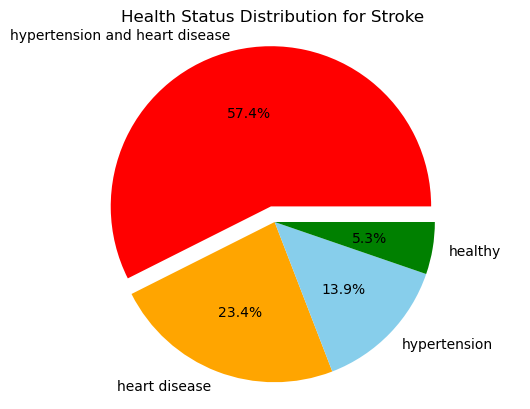

In [85]:
#Create the pie chart that show the stoke occurance for each type of health status
labels=["hypertension and heart disease","heart disease","hypertension","healthy"]
sizes=health_stroke_summary["Stroke"]
colors=["red","orange","skyblue","green"]
explode = (0.1, 0, 0, 0)
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',explode=explode)
plt.title("Health Status Distribution for Stroke")
plt.axis("equal") 
plt.savefig("graphs/healthstatus_stroke_pie.png")
plt.show()

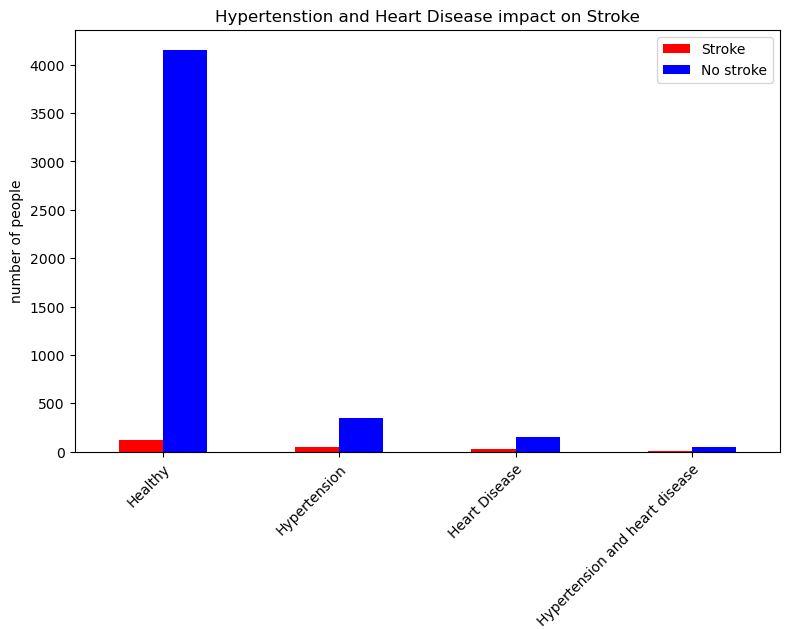

In [86]:
#create a bar chart to visualize the impact of hypertension and heart disease on stroke. 
health_stroke_fig = health_stroke_summary.plot(kind="bar", color=["red", "blue"], figsize=(8,6),
                                   title="Hypertenstion and Heart Disease impact on Stroke",
                                   xlabel="Health Status",
                                   ylabel="number of people")

# Configure x-tick rotation
xticklabels = health_status
health_stroke_fig.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)


# Resize plot to display labels
plt.tight_layout()
plt.savefig("graphs/hh_impact_stroke_bar.png")
plt.show()

In [87]:
#create a table that show percentage of the stroke for four health types
health_stroke_per= health_stroke/(health_stroke+health_ppl)*100
hypertension_stroke_per=hypertension_stroke/(hypertension_stroke+hypertension_ppl)*100
heart_disease_stroke_per=heart_disease_stroke/(heart_disease_stroke+heart_disease_ppl)*100
hh_stroke_per=hh_stroke/(hh_stroke+hh_ppl)*100

health_stroke_summary_percentage=pd.DataFrame({
    "Health Status": health_status, 
    "Stroke %": [health_stroke_per,hypertension_stroke_per,heart_disease_stroke_per,hh_stroke_per]
    })

health_stroke_summary_percentage

,Health Status,Stroke %
0,Healthy,2.808331
1,Hypertension,12.468193
2,Heart Disease,15.675676
3,Hypertension and heart disease,18.965517


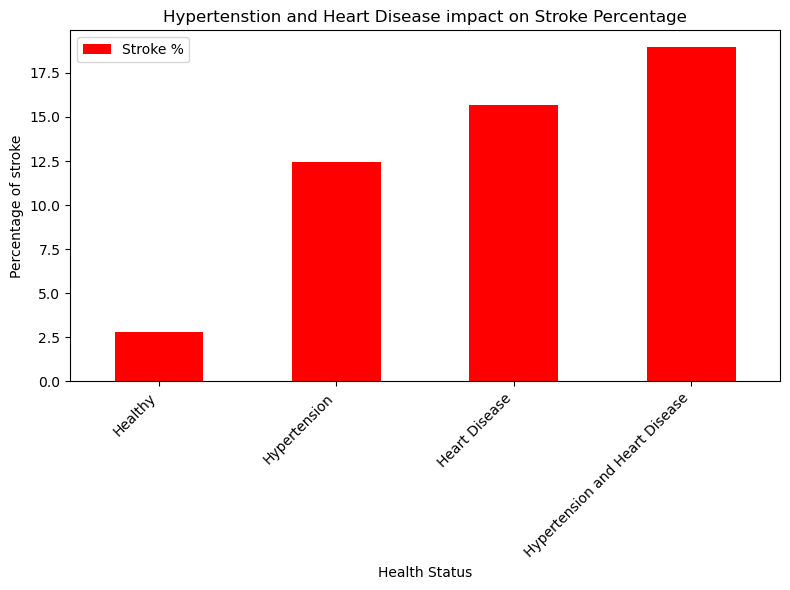

In [88]:
#create a bar chart to visualize the impact of hypertension and heart disease on stroke. 
health_stroke_perfig = health_stroke_summary_percentage.plot(kind="bar", color=["red"], figsize=(8,6),
                                   title="Hypertenstion and Heart Disease impact on Stroke Percentage",
                                   xlabel="Health Status",
                                   ylabel="Percentage of stroke")

# Configure x-tick rotation
xticklabels = ["Healthy", "Hypertension", "Heart Disease", "Hypertension and Heart Disease"]
plt.xticks(ticks=range(len(xticklabels)), labels=xticklabels, rotation=45, ha="right")

# Resize plot to display labels
plt.tight_layout()
plt.savefig("graphs/hh_impact_stroke_percantage_bar.png")
plt.show()

## Can Smoking Predict Likelyhood of Suffering A Stroke?

Hypothesis for this section: Smoking will have a significant impact on if a stroke is suffered, somewhat if someone has quit smoking, and minimal impact if they have never smoked.

Null Hypothesis for this section: Smoking as no impact on suffering a stroke.

In [89]:
# Breakdown of the smoking status column
 
smoking = stroke_predictive.value_counts("smoking_status")
smoking

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64

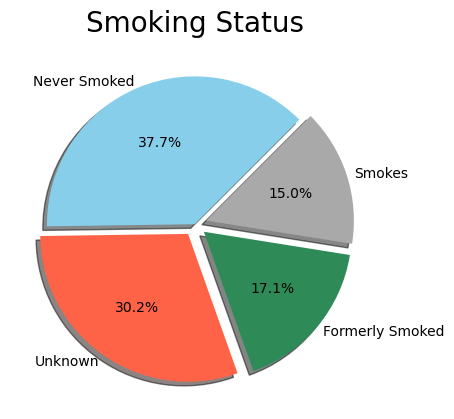

In [90]:
# Pie chart of smoking status counts

labels = ['Never Smoked', 'Unknown', 'Formerly Smoked', 'Smokes']
exploded = [0, 0.08, 0.08, 0.08]
plt.title("Smoking Status", fontsize=20, color="k")
plt.pie(smoking, colors=['skyblue', 'tomato', 'seagreen', 'darkgrey'], labels=labels, autopct='%1.1f%%', 
        shadow={'ox': -0.02, 'edgecolor': 'k', 'shade': 0.9}, startangle=45, explode=exploded, labeldistance=1.05)
plt.savefig("graphs/smoking_status.png")
plt.show()

In [91]:
# Number from each value of smoking status that had a stroke (==1)
# Number from each value of smoking status that did not have a stroke (==0)
# Numbers look similar to first pie chart

smoking_data_had_strokes = stroke_predictive[stroke_predictive["stroke"] == 1]
smoking_data_stroke_counts = smoking_data_had_strokes.value_counts("smoking_status")
smoking_data_had_no_strokes = stroke_predictive[stroke_predictive["stroke"] == 0]
smoking_data_no_stroke_counts = smoking_data_had_no_strokes.value_counts("smoking_status")
smoking_data_stroke_counts, smoking_data_no_stroke_counts

(smoking_status
 never smoked       84
 formerly smoked    57
 smokes             39
 Unknown            29
 Name: count, dtype: int64,
 smoking_status
 never smoked       1768
 Unknown            1454
 formerly smoked     780
 smokes              698
 Name: count, dtype: int64)

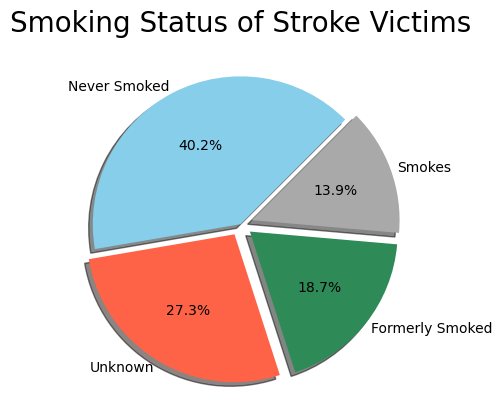

In [92]:
# Followed with a pie chart of only subjects that suffered a stroke.
# Chart looked near identical.
# Need percentages of stroke victims for each smoking catagory.
# This pie chart done entirely with plt.

plt.pie(smoking_data_stroke_counts, colors=['skyblue', 'tomato', 'seagreen', 'darkgrey'], labels=labels, autopct='%1.1f%%', 
        shadow={'ox': -0.02, 'edgecolor': 'k', 'shade': 0.9}, startangle=45, explode=exploded, labeldistance=1.05)
plt.title("Smoking Status of Stroke Victims", fontsize=20, color="k")
plt.savefig("graphs/smoking_status_stroke_victims.png")
plt.show()

In [93]:
# Dropped Unknown as it provided no insight.

smoker_stats = stroke_predictive[stroke_predictive["smoking_status"] == "smokes"]
smoker_statss = smoker_stats.value_counts("stroke")

former_smoker_stats = stroke_predictive[stroke_predictive["smoking_status"] == "formerly smoked"]
former_smoker_statss = former_smoker_stats.value_counts("stroke")

never_smoker_stats = stroke_predictive[stroke_predictive["smoking_status"] == "never smoked"]
never_smoker_statss = never_smoker_stats.value_counts("stroke")

print(smoker_statss, former_smoker_statss, never_smoker_statss)

stroke
0    698
1     39
Name: count, dtype: int64 stroke
0    780
1     57
Name: count, dtype: int64 stroke
0    1768
1      84
Name: count, dtype: int64


In [94]:
# Calculate Anova value for the three groups. 
# pvalue is over 0.05 (0.760) so not staistically significant
# Will plot out bar chart to visually confirm

st.f_oneway(smoker_statss, former_smoker_statss, never_smoker_statss)

F_onewayResult(statistic=0.30101907106657605, pvalue=0.7600802031755473)

In [95]:
# Created new dataframe splitting each catagory into subjects who did and did not suffer strokes.

smoking_df = pd.DataFrame({"smokers": smoker_statss,
                       "former smokers": former_smoker_statss,
                       "never smoked": never_smoker_statss})

smoking_df

,smokers,former smokers,never smoked
stroke,,,
0,698,780,1768
1,39,57,84


Axes(0.125,0.11;0.775x0.77)


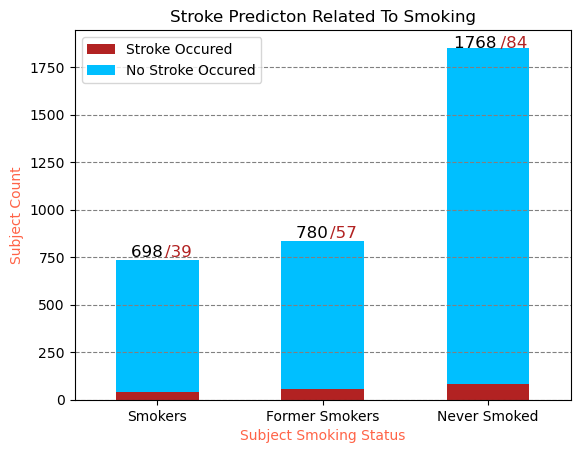

In [96]:
# Bar chart comparing stroke occurances to smoking status
# Manually entered numbers found in step above with only 6 datapoints.

stroke_values = [39, 57, 84]
no_stroke_values = [698, 780, 1768]
index = ['Smokers', 'Former Smokers', 'Never Smoked']
dff = pd.DataFrame({'Stroke Occured': stroke_values,
                    'No Stroke Occured': no_stroke_values}, index=index)
ax = dff.plot.bar(stacked = True, rot=0, title = "Stroke Predicton Related To Smoking", color={"Stroke Occured": "firebrick", "No Stroke Occured": "deepskyblue"})
ax.set_xlabel("Subject Smoking Status", color = "tomato")
ax.set_ylabel("Subject Count", color = "tomato")
plt.grid(linestyle="--", color='gray', axis="y")
plt.text(x=2, y=1850, s='1768     ',
                 color='k', fontsize=12, horizontalalignment='center')
plt.text(x=2, y=1850, s='          /84',
                 color='firebrick', fontsize=12, horizontalalignment='center')
plt.text(x=1, y=850, s='780    ',
                 color='k', fontsize=12, horizontalalignment='center')
plt.text(x=1, y=850, s='        /57',
                 color='firebrick', fontsize=12, horizontalalignment='center')
plt.text(x=0, y=750, s='698    ',
                 color='k', fontsize=12, horizontalalignment='center')
plt.text(x=0, y=750, s='        /39',
                 color='firebrick', fontsize=12, horizontalalignment='center')
plt.savefig("graphs/smoking_group_total.png")
print(ax)

In [97]:
smokingg_df = pd.DataFrame([smoking_data_stroke_counts / smoking_data_no_stroke_counts])*100
smokingg_df

smoking_status,Unknown,formerly smoked,never smoked,smokes
count,1.994498,7.307692,4.751131,5.587393


Axes(0.125,0.11;0.775x0.77)


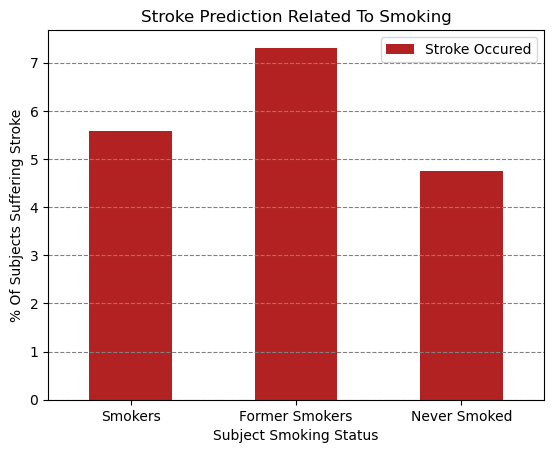

In [98]:
# Bar chart comparing stroke occurance to smoking status
# Manually entered numbers found in step above with only 3 datapoints.

percentage_values = [5.59, 7.31, 4.75]
index = ['Smokers', 'Former Smokers', 'Never Smoked']
dfff = pd.DataFrame({'Stroke Occured': percentage_values}, index=index)
ax = dfff.plot.bar(rot=0, title = "Stroke Prediction Related To Smoking", color="firebrick")
ax.set_xlabel("Subject Smoking Status", color = "k")
ax.set_ylabel("% Of Subjects Suffering Stroke", color = "k")
plt.grid(linestyle="--", color='gray', axis="y")
plt.savefig("graphs/smoke_victims.png")
print(ax)

## Analysis:
Smoking had no impact on likelyhood of suffering a stroke, regardless of currently or formerly smoking. With uneven subject counts for each catagory, as outlined in the first bar chart, a percentage of stroke sufferers was determined and used to calculate a p value.

pvalue=0.7600802031755473

Pvalue being over 0.05, the findings are not statistically significant and we will go with the Null Hypothesis, smoking as no impact on suffering a stroke.

The second bar chart documenting the percentage values displays how close the values are. 

# How do different types of work (Private, Self-employed, Govt_job, Never _worked) affect stroke risk?

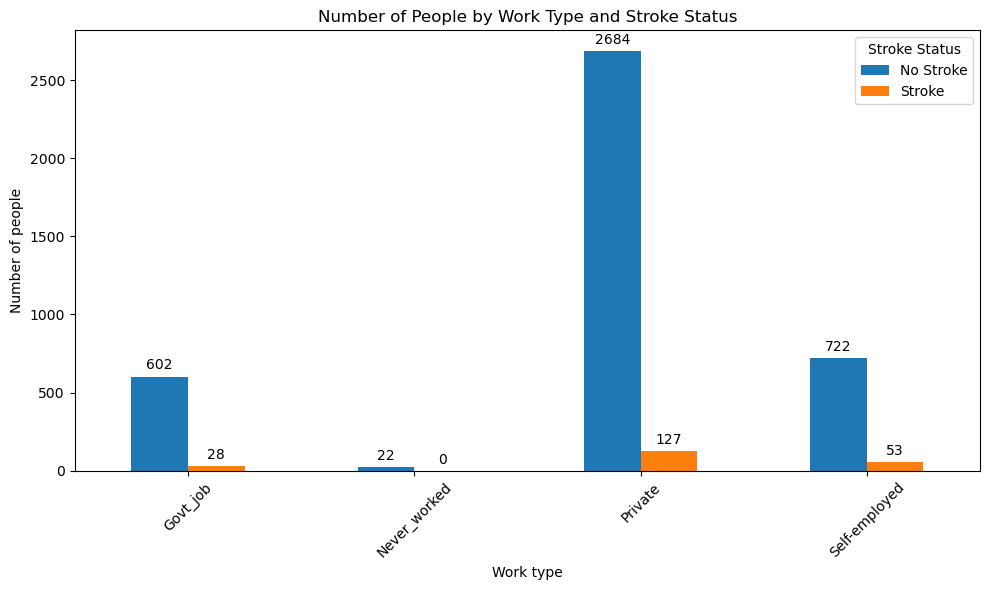

In [99]:
#Removing children from data

filtered_work_type = stroke_predictive[stroke_predictive["work_type"] != "children"]

#Group data by work type and stroke then count
work_type_count = filtered_work_type.groupby(["work_type" , "stroke"]).size().unstack(fill_value=0)

#Creating bar chart
bars_2 = work_type_count.plot(kind="bar" , figsize=(10 , 6))

#Adding labels and title
plt.title("Number of People by Work Type and Stroke Status")
plt.xlabel("Work type")
plt.ylabel("Number of people")
plt.xticks(rotation=45)
plt.legend(["No Stroke" , "Stroke"] , title= "Stroke Status")

#Adding the number of people ontop of each bar 
for bar in bars_2.containers:
    bars_2.bar_label(bar, fmt="%d" , padding= 3)

#Saving the chart
plt.savefig("graphs/Number of People by Work Type and Stroke Status")

#display the chart
plt.tight_layout()
plt.show()

This bar graph shows the number of people in diffrent work types , categorized by stroke status. For goverment jobs , only 28 out of 628 had a stroke sugessting a relatively low stroke occurence amoung goverment employees but strokes still occur. For never worked , none experienced a stroke , this could be due to the limited sample size for this group. For private sector , 127 out of 2648 people had experienced a stoke , this group is the largest population but still indicates that it has a notable stroke occurence. For self employed , 53 out of 775 people have had a stroke sugessting that self employed individuals face unique risk factors related to stroke when compared to other work types.

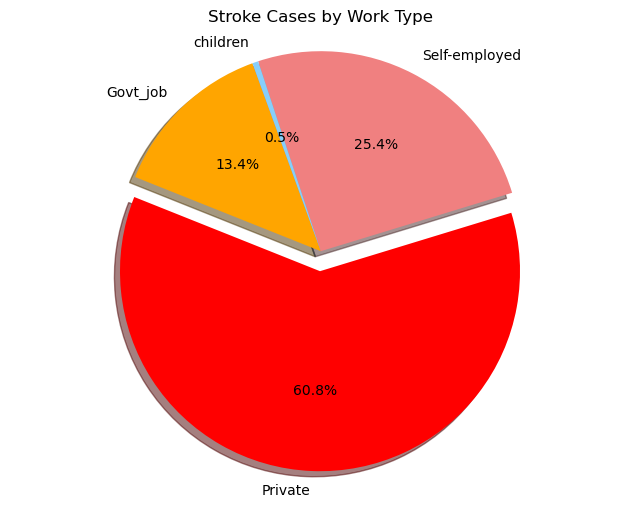

In [100]:
#Getting only the columns where Stroke = 1
stroke_patients_df = stroke_predictive[stroke_predictive["stroke"] ==1]
# Grouping the data by work type and counting occurrences of 'stroke'
work_type_count = stroke_patients_df.groupby("work_type").count()
# Extracting labels and values for the pie chart
labels = work_type_count.index
sizes = work_type_count['stroke']
# The colors of each section of the pie chart
colors = ["orange", "red", "lightcoral", "lightskyblue"]
# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0.1, 0, 0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(8,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=110)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis('equal')
# Adding a title
plt.title("Stroke Cases by Work Type")
plt.savefig("graphs/Number of stroke cases by Work Type")
# Showing the chart
plt.show()

# Does living in an urban or rural area affect stroke likelihood?

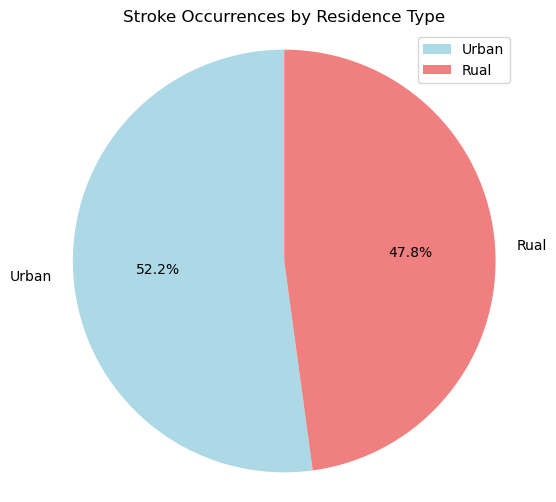

In [101]:
# Filtering data for people who have had a stroke
stroke_data = stroke_predictive[stroke_predictive["stroke"] == 1]

# grouping data by rual/urban and counting the number of strokes
residence_strokecount = stroke_data["residence_type"].value_counts()

#setting pie chart s,ize
plt.figure(figsize=(6,6))

#creating pie chart 
residence_strokecount.plot.pie(autopct= "%1.1f%%" , startangle = 90 , title = "Stroke Occurrences by Residence Type" , legend = True , colors = ["lightblue" , "lightcoral"] , labels = ["Urban" , "Rual"])

#Creating pie chart with equal axis
plt.axis("equal")
plt.ylabel("")

#Saving the chart
plt.savefig("graphs/Stroke Occurrences by Residence Type Pie Chart")

#output the pie chart
plt.show()

This Pie chart displays the stroke occurrence between people living in urban and rual areas. Urban residence types have a slightly higher protion of stroke occurrences at 52.2% compared to rual residence types at 47.8%.The close distribution suggests that the occurrence of strokes is relatively balanced between urban and rual residence types.Potential reasons for the slight diffrece could be varying lifestyle factors , access to healthcare and enviromental conditions that are not captured in the dataset.

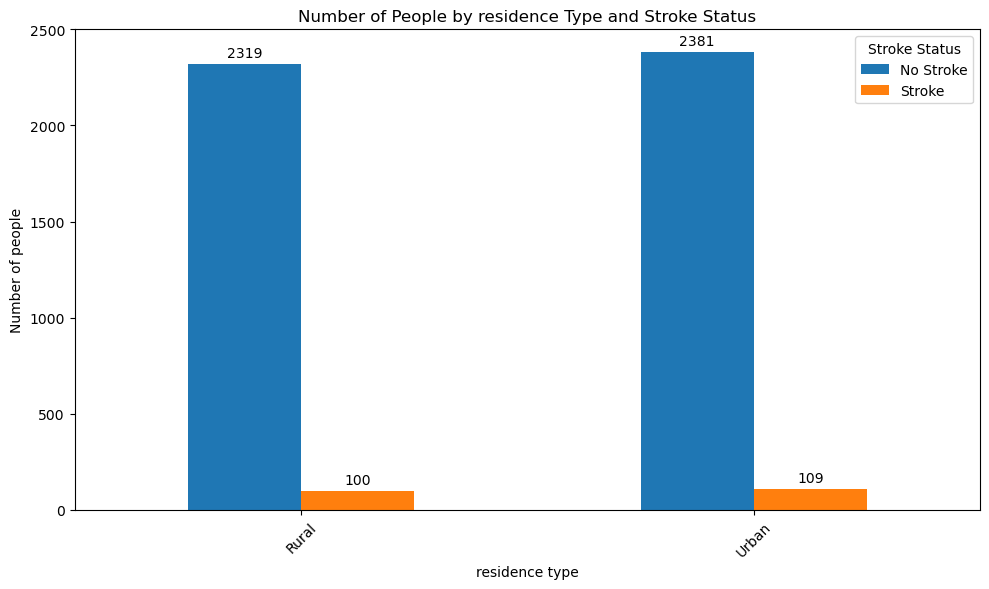

In [102]:
#Group data by residence type and stroke then count
residence_type_count = stroke_predictive.groupby(["residence_type" , "stroke"]).size().unstack(fill_value=0)
#Creating bar chart
bars_2 = residence_type_count.plot(kind="bar" , figsize=(10 , 6))
#Adding labels and title
plt.title("Number of People by residence Type and Stroke Status")
plt.xlabel("residence type")
plt.ylabel("Number of people")
plt.xticks(rotation=45)
plt.legend(["No Stroke" , "Stroke"] , title= "Stroke Status")
#Adding the number of people ontop of each bar 
for bar in bars_2.containers:
    bars_2.bar_label(bar, fmt="%d" , padding= 3)
#Saving the chart
plt.savefig("graphs/Number of People by residence Type and Stroke Status")
#display the chart
plt.tight_layout()
plt.show()

# What is the relationship between BMI and stroke occurrence?

In [103]:
# Establish the bins for bmi
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III']

In [104]:
# Creating a copy of the stroke prediction for later aggregations
stroke_patients_df = stroke_predictive.copy()

In [105]:
#Getting only the columns where there is a stroke
stroke_patients_df = stroke_patients_df[stroke_patients_df["stroke"] ==1]

In [106]:
# Add a BMI category column
stroke_patients_df['bmi_category'] = pd.cut(stroke_patients_df['bmi'], bmi_bins, labels=bmi_labels, include_lowest=True)
stroke_patients_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,61-70,Obese Class II
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,81-90,Obese Class I
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,41-50,Obese Class I
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,71-80,Normal
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,81-90,Overweight


In [107]:
# Grouping by BMI category
bmi_stroke_group = stroke_patients_df.groupby('bmi_category').size()
bmi_stroke_group

bmi_category
Underweight         1
Normal             35
Overweight         75
Obese Class I      56
Obese Class II     23
Obese Class III    19
dtype: int64

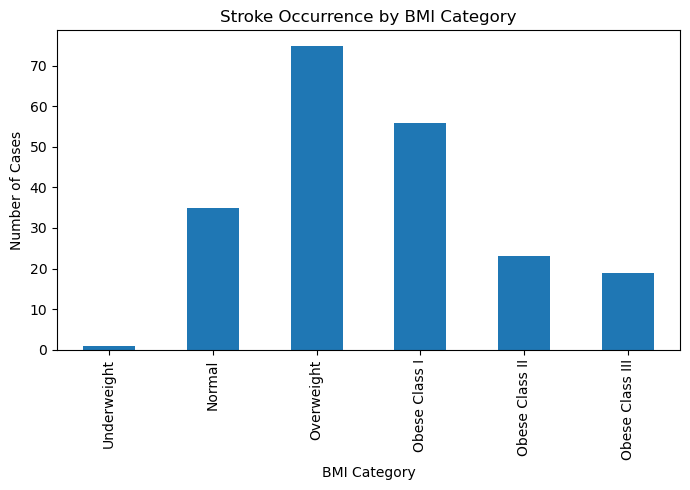

In [108]:
# Plot bar chart
bmi_stroke_group.plot(kind='bar', figsize=(7,5))

#Giving the chart some labels
plt.title('Stroke Occurrence by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Number of Cases')

#Adjusting the layout of the plot to ensure proper spacing of elements
plt.tight_layout()

# Saving the figure
plt.savefig("graphs/Stroke Occurrence by BMI Category.png")

#Displaying the chart
plt.show()

There is a relationship between the BMI category and the Stroke occurrence. The "Underweight" BMI category shows the lowest number of stroke occurrences. The "Overweight" BMI category has the highest number of stroke occurrences, indicating in this category may be more prone to stroke than other BMI categories. However, the "Obese Class I II and III" show fewer stroke occurrences than the "Overweight" which may seem counterintuitive. This could suggest that BMI alone may not fully explain the stroke risk.   

In [109]:
# Group by gender and BMI category
#Used this link to get be able to get use the unstack function https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html
bmi_gender_group = stroke_patients_df.groupby(['bmi_category', 'gender']).size().unstack(fill_value=0)
bmi_gender_group

gender,Female,Male
bmi_category,,
Underweight,1,0
Normal,26,9
Overweight,40,35
Obese Class I,29,27
Obese Class II,12,11
Obese Class III,12,7


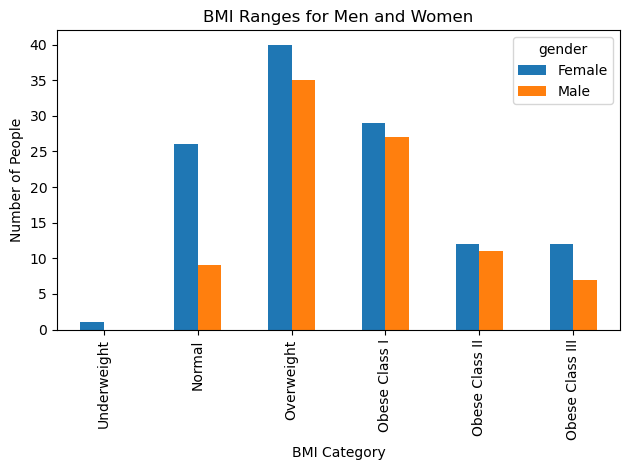

In [110]:
# Plot stacked bar chart
bmi_gender_group.plot(kind='bar')

#Giving the chart some labels
plt.title('BMI Ranges for Men and Women')
plt.xlabel('BMI Category')
plt.ylabel('Number of People')

#Adjusting the layout of the plot to ensure proper spacing of elements
plt.tight_layout()

# Saving the figure
plt.savefig("graphs/BMI Ranges for Men and Women.png")

#Displaying the chart
plt.show()

This chart shows a greater percentage of women are categorized as either "Overweight" or "Obese Class I" compared to men. Therefore, the data suggests that women may be at higher risk of being overweight compared to men. Overall, this chart shows how the distribution of BMI categories changes by gender, which may be useful in understanding the variations in health risk factors between men and women. 

In [111]:
# Establish the bins for age
age_bins = [40, 50, 60, 70, 80, 90]  # Define age ranges
age_labels = ['40-50', '50-60', '60-70', '70-80', '80-90']  # Label each range

In [112]:
# Adding a age group column
stroke_patients_df['age_group'] = pd.cut(stroke_patients_df['age'], bins=age_bins, labels=age_labels)


In [113]:
# Calculating average BMI for each age group
stroke_avg_bmi_by_age = stroke_patients_df.groupby('age_group')['bmi'].mean()
stroke_avg_bmi_by_age

age_group
40-50    33.226667
50-60    33.142857
60-70    32.216667
70-80    28.754321
80-90    26.782609
Name: bmi, dtype: float64

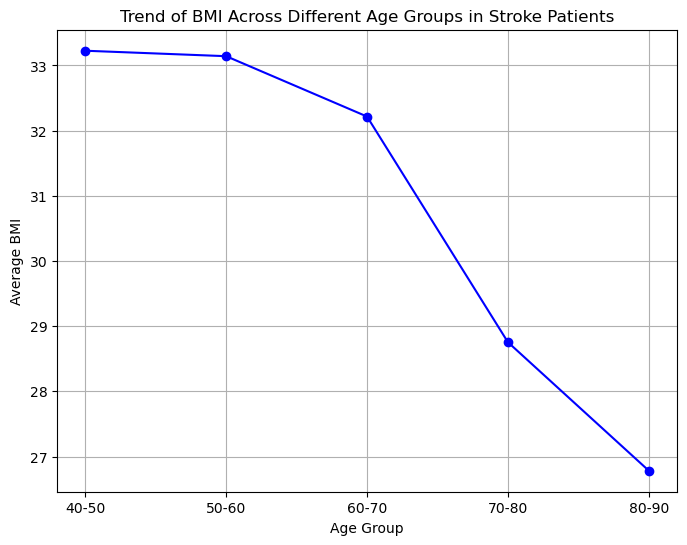

In [114]:
#Creating the figure for the line plot with a specific size
plt.figure(figsize=(8,6))

# Plotting the line charts for the stroke and no stroke data
plt.plot(stroke_avg_bmi_by_age.index, stroke_avg_bmi_by_age.values, marker='o', linestyle='-', color='blue', label='Stroke')

#Giving the chart some labels
plt.title('Trend of BMI Across Different Age Groups in Stroke Patients')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')

# Adding grid lines to the chart
plt.grid(True)

# Saving the figure
plt.savefig("graphs/Trend of BMI Across Different Age Groups in Stroke Patients.png")

#Displaying the chart
plt.show()

There is an inverse relationship which shows a downward trend in BMI as age increases. For the 40-50 age group the average BMI is around 33, but by the 80-90 age group it drops to around 27. So older stroke patients tend to have a significantly lower BMI compared to younger patients. Therefore, this suggests that variables such as health related changes or the BMI (may be in the underweight or normal categories) in older age may lead to reduced BMI in stroke patients.

# How do glucose levels vary across patients with stroke?

In [115]:
stroke_patients_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60-70,Obese Class II
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,70-80,Obese Class I
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-50,Obese Class I
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,70-80,Normal
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,80-90,Overweight


In [116]:
# Calculate average glucose levels for each age group (stroke patients)
age_group_avg_stroke = stroke_patients_df.groupby('age_group')['avg_glucose_level'].mean()
age_group_avg_stroke

age_group
40-50    107.465333
50-60    129.956905
60-70    149.764524
70-80    140.119012
80-90    128.698696
Name: avg_glucose_level, dtype: float64

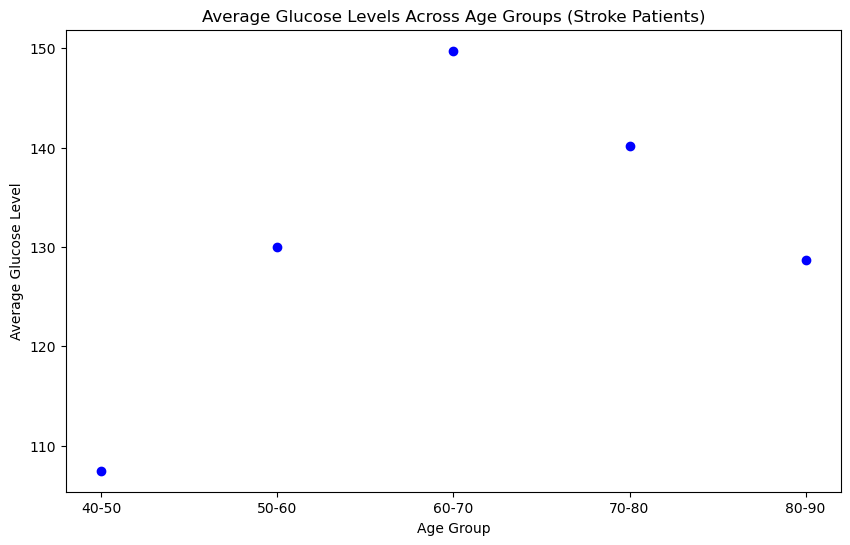

In [117]:
#Creating the figure for the line plot with a specific size
plt.figure(figsize=(10,6))

# Scatter plot for stroke patients
plt.scatter(age_group_avg_stroke.index, age_group_avg_stroke.values, color='blue', label='Stroke')

#Giving the chart some labels
plt.title('Average Glucose Levels Across Age Groups (Stroke Patients)')
plt.xlabel('Age Group')
plt.ylabel('Average Glucose Level')

# Saving the figure
plt.savefig("graphs/Average Glucose Levels Across Age Groups (Stroke Patients).png")

# Show the plot

There is a general pattern of rising average glucose levels with age in stroke patients, with a peak in the 70-50 age range. After this age range, glucose levels appear to drop significantly. This might suggest that older stroke patients had higher glucose levels, however it decreases somewhat for the older group. The decrease in older group could be due to having a strict lifestyle change like diet or medication adherence.

In [118]:
# Stroke categories
stroke_categories = [1]  # 1 = Stroke
glucose_levels = []

# Calculate IQR and potential outliers for each stroke group
for stroke in stroke_categories:
    
    # Locate the rows which contain individuals with and without strokes and get avg glucose levels
    stroke_data = stroke_predictive[stroke_predictive['stroke'] == stroke]['avg_glucose_level']
    
    # Add glucose levels to the list (for plotting)
    glucose_levels.append(stroke_data)
    
    # Calculate quartiles and IQR
    quartiles = stroke_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify potential outliers
    outliers = stroke_data[(stroke_data < lower_bound) | (stroke_data > upper_bound)]
    
    # Print the outliers
    print(f"Stroke potential outliers: {outliers}")

Stroke potential outliers: Series([], Name: avg_glucose_level, dtype: float64)


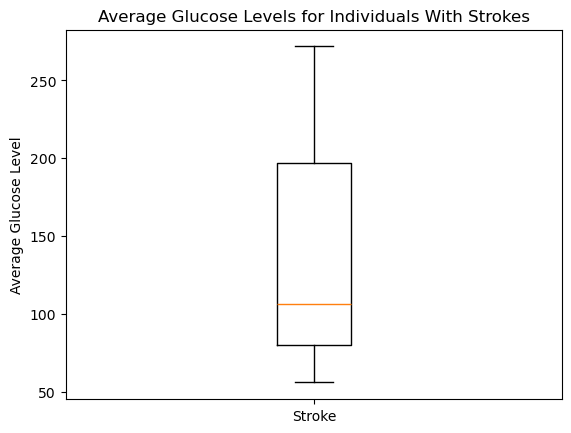

In [119]:
#Creating a figure and axis for the box plot using subplots
fig, ax = plt.subplots()

#Generating the box plot for the glucose levels data for the stroke occurance
bp = ax.boxplot(glucose_levels,labels=stroke_categories)

#Customize plot
ax.set_title('Average Glucose Levels for Individuals With Strokes')
ax.set_ylabel('Average Glucose Level')
ax.set_xticklabels(['Stroke'])

#Customizing the appearance of the outliers (fliers) in the box plot
plt.setp(bp['fliers'], marker='o', markerfacecolor='r', markersize=4, linestyle='none')

# Saving the figure
plt.savefig("graphs/Average Glucose Levels for Individuals With Strokes.png")

#Displaying the box plot chart
plt.show()


The range of glucose levels in stroke patients is highly diverse, with central tendency of approximately 100. However, some people's glucose levels might range from 60 to 250. This implies that glucose levels vary greatly in stroke patients, with having raised glucose levels, which might indicate a link between higher glucose levels and stroke occurrences. The large range may also reflect other variables, such as underlying diabetes, or differing level of glucose control among individuals.